In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
%matplotlib inline

In [4]:
# Columns in csv file
NAME = 'Name'
CLASS = 'Class'
GENDER = 'Gender'
AGE = 'Age'
SIBLINGS_COUNT = 'Siblings Count'
PARENTS_COUNT = 'Parents Count'
FARE = 'Fare'
EMBARKED = 'Embarked'
SURVIVED = 'Survived'

In [16]:
# Read csv file
df = pd.read_csv('ship_data.csv')
print display(df)

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
0,1,3,Alexander Harris,male,22.0,1,0,7250.0,New York,0
1,2,1,Frank Parsons,female,38.0,1,0,71283.3,Los Angeles,1
2,3,3,Anthony Churchill,female,26.0,0,0,7925.0,New York,1
3,4,1,Alexandra Hughes,female,35.0,1,0,53100.0,New York,1
4,5,3,Joan Fraser,male,35.0,0,0,8050.0,New York,0
5,6,3,Megan Clarkson,male,NaN,0,0,8458.3,Chicago,0
6,7,1,Molly Bower,male,54.0,0,0,51862.5,New York,0
7,8,3,Steven Jones,male,2.0,3,1,21075.0,New York,0
8,9,3,Bernadette Vance,female,27.0,0,2,11133.3,New York,1
9,10,2,Irene Chapman,female,-20.0,1,0,30070.8,Los Angeles,1


None


In [17]:
# Data cleaning

# Replacing missing values
print ("Count of null values present in each column : ")
print df.isnull().sum()

# Replace null values with a suitable dummy values
df[AGE] = df[AGE].fillna(0)
df[EMBARKED] = df[EMBARKED].fillna("Not Available")

print ("\n")
print ("Count of null values present in each column : ")
print df.isnull().sum()
print ("\n")

Count of null values present in each column : 
Passenger ID        0
Class               0
Name                0
Gender              0
Age               177
Siblings Count      0
Parents Count       0
Fare                0
Embarked            2
Survived            0
dtype: int64


Count of null values present in each column : 
Passenger ID      0
Class             0
Name              0
Gender            0
Age               0
Siblings Count    0
Parents Count     0
Fare              0
Embarked          0
Survived          0
dtype: int64




# Data Analysis 
- 		   Data cleaning
- 		   Label Encoding
- 		   Correlation Matrix
-          Pair Plot
-		   Feature Engineering

In [18]:
# Discard irregular rows
print df[AGE].unique()
df = df[df[AGE]>=0]

# Range Constraints
df = df[df[AGE]<=100]

[  22.     38.     26.     35.      0.     54.      2.     27.    -20.
    4.     58.     20.     39.     14.     55.     31.     34.     15.
   -5.      8.     19.     40.     66.     28.     42.     21.     18.
    3.      7.     49.     29.     65.     28.5     5.     11.     45.
   17.    200.     32.     16.    150.     25.      0.83   30.     33.
   23.     24.     46.     59.     71.     37.     47.     14.5    70.5
   32.5    12.      9.     36.5    51.     55.5    40.5    44.      1.
   61.     56.     50.     36.     45.5    20.5    62.     41.     52.
   63.     23.5     0.92   43.     60.     10.     64.     13.     48.
    0.75   53.     57.     80.     70.     24.5     6.      0.67   30.5
    0.42   34.5    74.  ]


### Few more data cleaning steps : ###
- Correcting invalid values. Eg. a string in a column which expects a number.

- Standardising categories. Eg. US, USA, United States -> Different terms can be used which have the same meaning. Make this uniform.

 
  

In [20]:
# Label Encoding
df[GENDER] = LabelEncoder().fit_transform(df[GENDER])
df[EMBARKED] = LabelEncoder().fit_transform(df[EMBARKED])

print display(df.head())

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
0,1,3,Alexander Harris,1,22.0,1,0,7250.0,2,0
1,2,1,Frank Parsons,0,38.0,1,0,71283.3,1,1
2,3,3,Anthony Churchill,0,26.0,0,0,7925.0,2,1
3,4,1,Alexandra Hughes,0,35.0,1,0,53100.0,2,1
4,5,3,Joan Fraser,1,35.0,0,0,8050.0,2,0


None


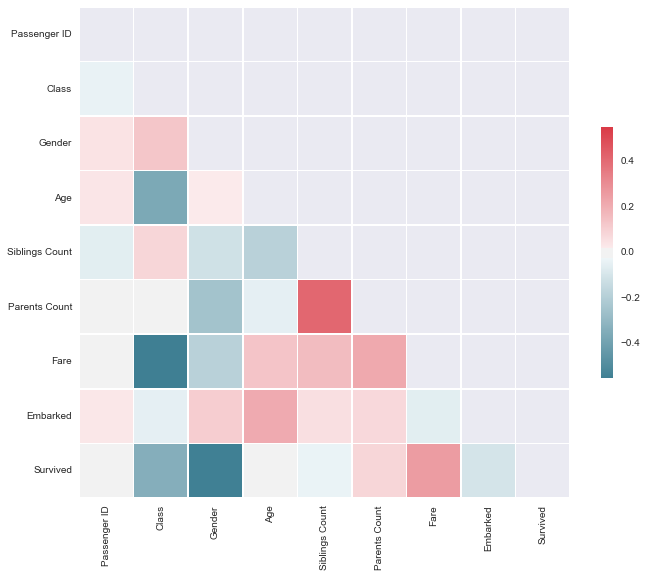

In [9]:
# Correlation matrix

corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

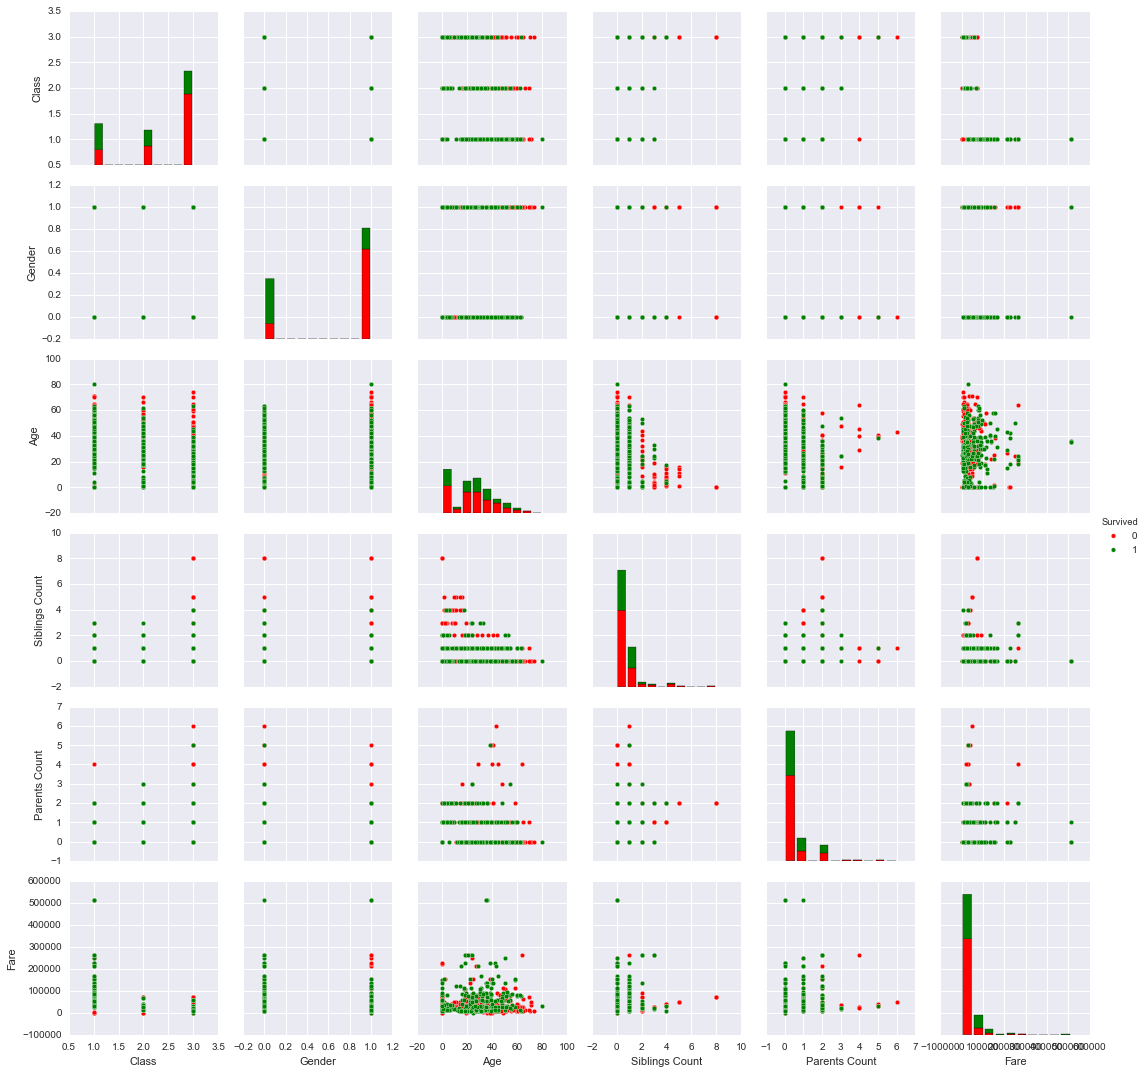

In [21]:
# Pairplot
sns.pairplot(df, vars=[CLASS, GENDER, AGE, SIBLINGS_COUNT, PARENTS_COUNT, FARE], hue=SURVIVED, palette=["r", "g"])         

In [23]:
# Feature Engineering
# A simple example

df['Family Members Count'] = df[SIBLINGS_COUNT] + df[PARENTS_COUNT] 

# New feature
df['Is Alone'] = (df['Family Members Count'] == 0)

print display(df.head(20))

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived,Family Members Count,Is Alone
0,1,3,Alexander Harris,1,22.0,1,0,7250.0,2,0,1,False
1,2,1,Frank Parsons,0,38.0,1,0,71283.3,1,1,1,False
2,3,3,Anthony Churchill,0,26.0,0,0,7925.0,2,1,0,True
3,4,1,Alexandra Hughes,0,35.0,1,0,53100.0,2,1,1,False
4,5,3,Joan Fraser,1,35.0,0,0,8050.0,2,0,0,True
5,6,3,Megan Clarkson,1,0.0,0,0,8458.3,0,0,0,True
6,7,1,Molly Bower,1,54.0,0,0,51862.5,2,0,0,True
7,8,3,Steven Jones,1,2.0,3,1,21075.0,2,0,4,False
8,9,3,Bernadette Vance,0,27.0,0,2,11133.3,2,1,2,False
10,11,3,Gavin Payne,0,4.0,1,1,16700.0,2,1,2,False


None
